In [110]:
import pandas as pd

## Data Collection & Preprocessing

### Data Collection and Key Purpose
Our key dataset is Divvy Bike Share Service data, from https://divvy-tripdata.s3.amazonaws.com/index.html. We selected data in year 2019, which consists of 4 csv files,from Q1 to Q4.

(Key Purpose to be filled up after machine learning part)

In [111]:
# Define the file paths for each quarter's data
file_paths = {
    'Q1': 'data/Divvy_Trips_2019_Q1.csv',
    'Q2': 'data/Divvy_Trips_2019_Q2.csv',
    'Q3': 'data/Divvy_Trips_2019_Q3.csv',
    'Q4': 'data/Divvy_Trips_2019_Q4.csv'
}

Check if the 4 files share identical column names in order to concatenate all quarters.

In [112]:
# Display the column names of each file to see the differences
for key, file_path in file_paths.items():
    df = pd.read_csv(file_path, nrows=1)  # Load just the first row for speed
    print(f"\nColumn names in {key}:")
    print(df.columns.tolist())



Column names in Q1:
['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthyear']

Column names in Q2:
['01 - Rental Details Rental ID', '01 - Rental Details Local Start Time', '01 - Rental Details Local End Time', '01 - Rental Details Bike ID', '01 - Rental Details Duration In Seconds Uncapped', '03 - Rental Start Station ID', '03 - Rental Start Station Name', '02 - Rental End Station ID', '02 - Rental End Station Name', 'User Type', 'Member Gender', '05 - Member Details Member Birthday Year']

Column names in Q3:
['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthyear']

Column names in Q4:
['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthy

It is clear that from the previous output, Q2 has different column names. Thus, we need to convert them to the same naming convention.

In [113]:
# Define the correct column names for consistency
correct_columns = [
    'trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 
    'from_station_id', 'from_station_name', 'to_station_id', 
    'to_station_name', 'usertype', 'gender', 'birthyear'
]

# Load each CSV file, rename columns, and store in a list
dfs = []
for key, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    # Rename columns for Q2 as they do not match
    if key == 'Q2':
        df.columns = correct_columns
    dfs.append(df)

    # Display column names after renaming for verification
    print(f"\nColumn names in {key} after renaming:")
    print(df.columns.tolist())

# Concatenate all quarters into a single DataFrame
df_all_quarters = pd.concat(dfs, ignore_index=True)


Column names in Q1 after renaming:
['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthyear']

Column names in Q2 after renaming:
['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthyear']

Column names in Q3 after renaming:
['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthyear']

Column names in Q4 after renaming:
['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthyear']


### Data Preprocessing

**Step 1**

Convert the format of data.

In [114]:
# Convert 'start_time' and 'end_time' to datetime for easier manipulation
df_all_quarters['start_time'] = pd.to_datetime(df_all_quarters['start_time'], errors='coerce')
df_all_quarters['end_time'] = pd.to_datetime(df_all_quarters['end_time'], errors='coerce')

# Convert 'tripduration' to a numeric value (remove any commas and convert to float)
df_all_quarters['tripduration'] = pd.to_numeric(df_all_quarters['tripduration'].str.replace(',', ''), errors='coerce')

**Step 2**

Check missing values and replace them.

In [115]:
# Find the number of missing values in 'gender' and 'birthyear'
print("Missing values in 'start_time':", df_all_quarters['start_time'].isnull().sum())
print("Missing values in 'end_time':", df_all_quarters['end_time'].isnull().sum())
print("Missing values in 'tripduration':", df_all_quarters['tripduration'].isnull().sum())
print("Missing values in 'usertype':", df_all_quarters['usertype'].isnull().sum())
print("Missing values in 'gender':", df_all_quarters['gender'].isnull().sum())
print("Missing values in 'birthyear':", df_all_quarters['birthyear'].isnull().sum())

Missing values in 'start_time': 0
Missing values in 'end_time': 0
Missing values in 'tripduration': 0
Missing values in 'usertype': 0
Missing values in 'gender': 559206
Missing values in 'birthyear': 538751


In [116]:
# Replace missing values in 'gender' with "Unknown"
df_all_quarters['gender'].fillna('Unknown', inplace=True)

# Convert 'birthyear' to integers, filling missing values with a placeholder (e.g., 0 for unknown)
df_all_quarters['birthyear'] = df_all_quarters['birthyear'].fillna(0).astype(int)

# Check missing values in 'gender' after replacement
print("\nMissing values in 'gender' after replacement:", df_all_quarters['gender'].isnull().sum())

# Check missing values in 'birthyear' after replacement
print("\nMissing values in 'birthyear' after replacement:", df_all_quarters['birthyear'].isnull().sum())


Missing values in 'gender' after replacement: 0

Missing values in 'birthyear' after replacement: 0


**Step 3**

Check Duplicates.

In [117]:
# Check the number of duplicates
print("\nNumber of duplicate rows before removal:", df_all_quarters.duplicated().sum())

# Remove duplicates
df_all_quarters.drop_duplicates(inplace=True)

# Check the number of duplicates after removal
print("Number of duplicate rows after removal:", df_all_quarters.duplicated().sum())


Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0


**Step 4**

Feature Engineering

In [118]:
# Add a new column to categorize 'birthyear' into age groups
def categorize_birthyear(birthyear):
    if birthyear == 0:
        return "Unknown"
    elif birthyear < 1960:
        return "before 1960"
    elif 1960 <= birthyear < 1970:
        return "1960-1969"
    elif 1970 <= birthyear < 1980:
        return "1970-1979"
    elif 1980 <= birthyear < 1990:
        return "1980-1989"
    elif 1990 <= birthyear < 2000:
        return "1990-1999"
    else:
        return "after 1999"

df_all_quarters['age_group'] = df_all_quarters['birthyear'].apply(categorize_birthyear)

# Add columns for 'start_month' and 'start_day_of_week'
df_all_quarters['start_month'] = df_all_quarters['start_time'].dt.strftime('%b')  # Jan, Feb, ..., Dec
df_all_quarters['start_day_of_week'] = df_all_quarters['start_time'].dt.strftime('%a')  # Mon, Tue, ..., Sun


In [119]:
# Display a few rows to verify the changes
print("\nSample of processed data:")
print(df_all_quarters[['gender', 'birthyear', 'age_group', 'start_month', 'start_day_of_week']].head())


Sample of processed data:
   gender  birthyear  age_group start_month start_day_of_week
0    Male       1989  1980-1989         Jan               Tue
1  Female       1990  1990-1999         Jan               Tue
2  Female       1994  1990-1999         Jan               Tue
3    Male       1993  1990-1999         Jan               Tue
4    Male       1994  1990-1999         Jan               Tue


**Step 5**

Remove invalid trip durations and outliers using IQR method

In [120]:
# Step 1: Remove trip durations below 0 or above 24 hours (86,400 seconds)
invalid_trip_count = df_all_quarters[(df_all_quarters['tripduration'] < 0) | (df_all_quarters['tripduration'] > 86400)].shape[0]
print(f"Number of invalid trip durations (below 0 or above 24 hours): {invalid_trip_count}")

# Filter out the invalid trip durations
df_all_quarters = df_all_quarters[(df_all_quarters['tripduration'] >= 0) & (df_all_quarters['tripduration'] <= 86400)]

# Step 2: Remove outliers in 'tripduration' using the IQR method
Q1 = df_all_quarters['tripduration'].quantile(0.25)
Q3 = df_all_quarters['tripduration'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = df_all_quarters[(df_all_quarters['tripduration'] < lower_bound) | (df_all_quarters['tripduration'] > upper_bound)].shape[0]
print(f"Number of outliers in 'tripduration': {outliers_count}")

# Filter out the outliers
df_all_quarters = df_all_quarters[(df_all_quarters['tripduration'] >= lower_bound) & (df_all_quarters['tripduration'] <= upper_bound)]

# Display the result after filtering
print("\nData after removing invalid trip durations and outliers:")
print(df_all_quarters[['tripduration']].describe().round(2))

Number of invalid trip durations (below 0 or above 24 hours): 1848
Number of outliers in 'tripduration': 266545

Data after removing invalid trip durations and outliers:
       tripduration
count    3549611.00
mean         817.31
std          549.43
min           61.00
25%          393.00
50%          659.00
75%         1115.00
max         2588.00


## Exploratory Data Analysis (EDA)

The goal of this section is to gain insight into the distribution, characteristics, and potential relationships of the dataset.

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
# Make the dataframe name brief.
df = df_all_quarters

**Step 1**

Calculate the proportion of customers and subscribers.

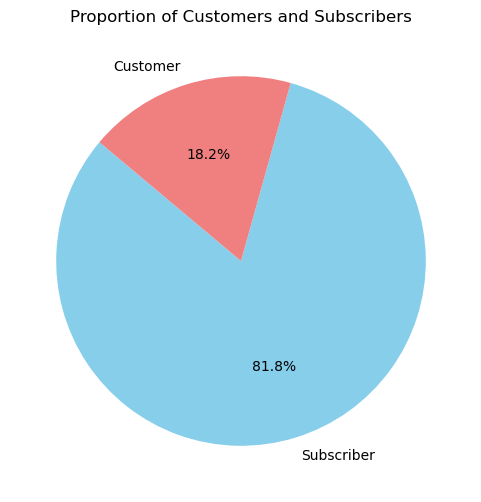

In [123]:
usertype_counts = df['usertype'].value_counts()

plt.figure(figsize=(6, 6))
usertype_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Customers and Subscribers')
plt.ylabel('')
plt.show()

**Step 2**

Calculate the average ride time for subscribers and customers.

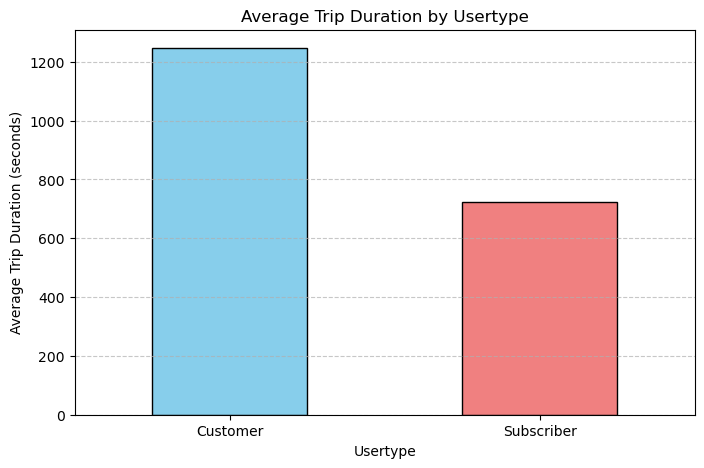

In [124]:
avg_trip_duration = df.groupby('usertype')['tripduration'].mean()

plt.figure(figsize=(8, 5))
avg_trip_duration.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')
plt.title('Average Trip Duration by Usertype')
plt.xlabel('Usertype')
plt.ylabel('Average Trip Duration (seconds)')
plt.xticks(rotation=0)  # 使x轴标签水平显示
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Step 3**

Calculate the male to female ratio of customers, subscribers and overall.

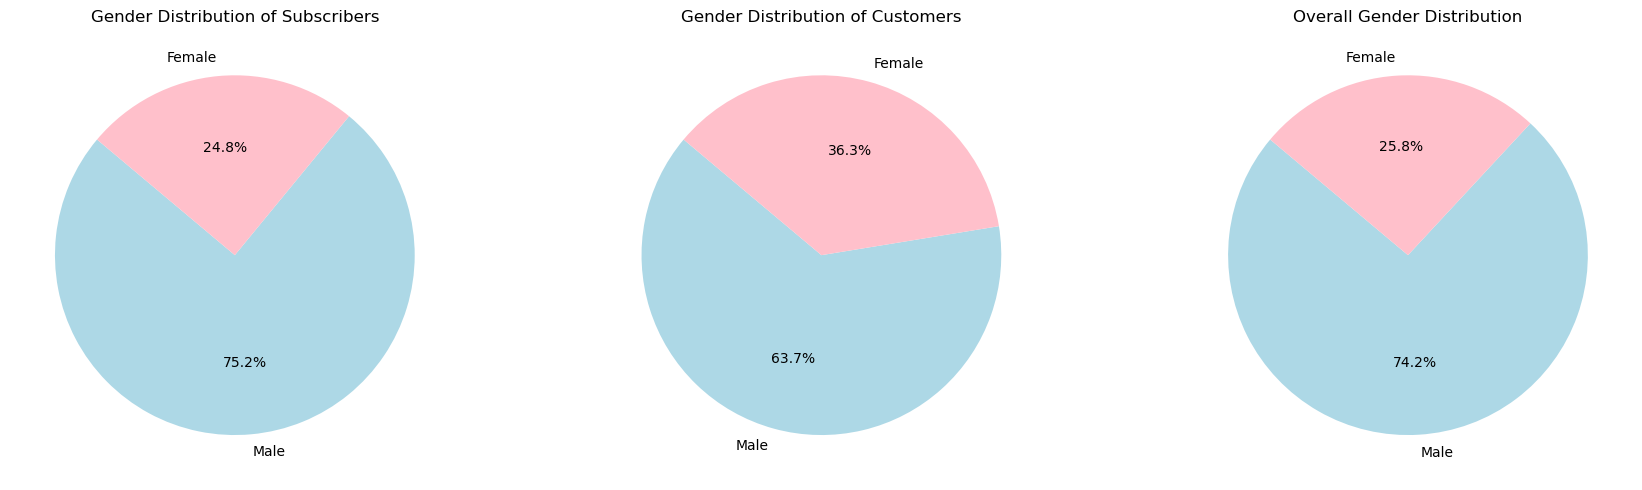

In [125]:
# Filter out unknown data in gender.
df_filtered = df[df['gender'] != 'Unknown']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

colors = {'Male': 'lightblue', 'Female': 'pink'}

# 1. Calculate the male/female ratio of subscribers.
subscriber_gender_counts = df_filtered[df_filtered['usertype'] == 'Subscriber']['gender'].value_counts()
axes[0].pie(subscriber_gender_counts, 
            labels=subscriber_gender_counts.index, 
            autopct='%1.1f%%', 
            startangle=140, 
            colors=[colors.get(gender, 'gray') for gender in subscriber_gender_counts.index])
axes[0].set_title('Gender Distribution of Subscribers')

# 2. Calculate the male/female ratio of customers.
customer_gender_counts = df_filtered[df_filtered['usertype'] == 'Customer']['gender'].value_counts()
axes[1].pie(customer_gender_counts, 
            labels=customer_gender_counts.index, 
            autopct='%1.1f%%', 
            startangle=140, 
            colors=[colors.get(gender, 'gray') for gender in customer_gender_counts.index])
axes[1].set_title('Gender Distribution of Customers')

# 3. Calculate the overall male/female ratio.
overall_gender_counts = df_filtered['gender'].value_counts()
axes[2].pie(overall_gender_counts, 
            labels=overall_gender_counts.index, 
            autopct='%1.1f%%', 
            startangle=140, 
            colors=[colors.get(gender, 'gray') for gender in overall_gender_counts.index])
axes[2].set_title('Overall Gender Distribution')

plt.tight_layout()
plt.show()

**Step 4**

Calculate the average trip duration for different genders.

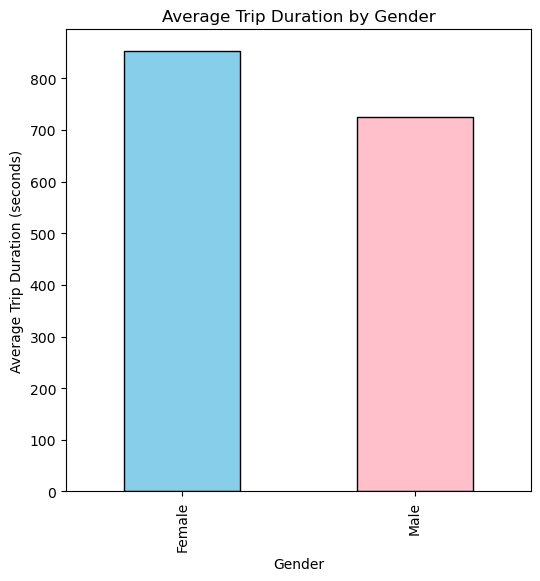

In [126]:
gender_avg_duration = df_filtered.groupby('gender')['tripduration'].mean()

plt.figure(figsize=(6, 6))
gender_avg_duration.plot(kind='bar', color=['skyblue', 'pink', 'gray'], edgecolor='black')
plt.title('Average Trip Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Trip Duration (seconds)')
plt.show()

**Step 5**

Calculate the age group distribution of customers, subscribers and overall.

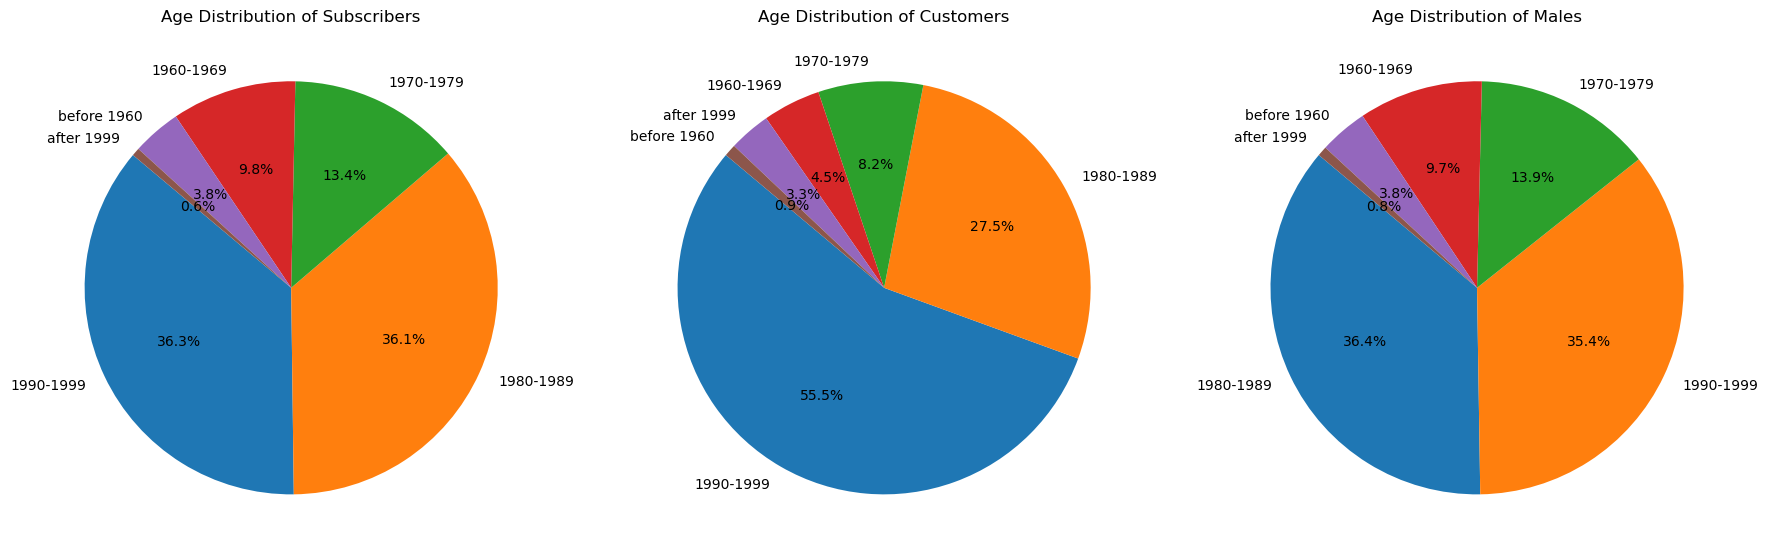

In [134]:
# Filter out unknown data in age_group.
df_filtered = df[df['age_group'] != 'Unknown']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Calculate the age ratio of all subscribers.
subscriber_age_counts = df_filtered[df_filtered['usertype'] == 'Subscriber']['age_group'].value_counts()
axes[0].pie(subscriber_age_counts, labels=subscriber_age_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
axes[0].set_title('Age Distribution of Subscribers')

# 2. Calculate the age ratio of all customers.
customer_age_counts = df_filtered[df_filtered['usertype'] == 'Customer']['age_group'].value_counts()
axes[1].pie(customer_age_counts, labels=customer_age_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel2.colors)
axes[1].set_title('Age Distribution of Customers')

# 3. Calculate the overall age ratio.
male_age_counts = df_filtered[df_filtered['gender'] == 'Male']['age_group'].value_counts()
axes[2].pie(male_age_counts, labels=male_age_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Accent.colors)
axes[2].set_title('Age Distribution of Males')

plt.tight_layout()
plt.show()

**Step 6**

Calculate the average ride time for different age groups.

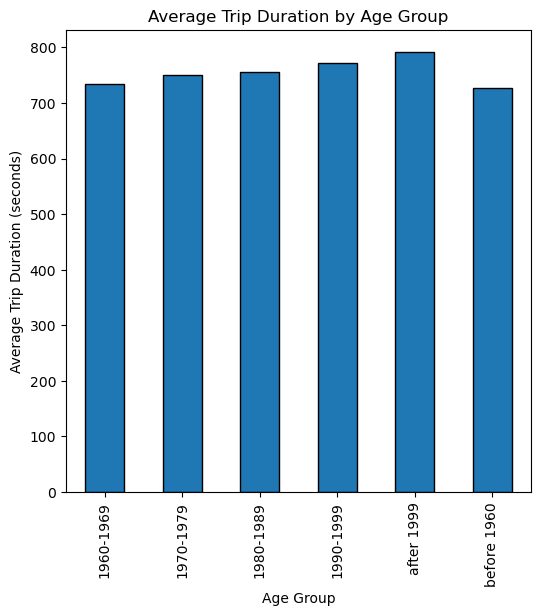

In [128]:
age_avg_duration = df_filtered.groupby('age_group')['tripduration'].mean()

plt.figure(figsize=(6, 6))
age_avg_duration.plot(kind='bar', edgecolor='black')
plt.title('Average Trip Duration by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Trip Duration (seconds)')
plt.show()

**Step 7**

Calculate the average ride time for each month of the year and each day of the week.

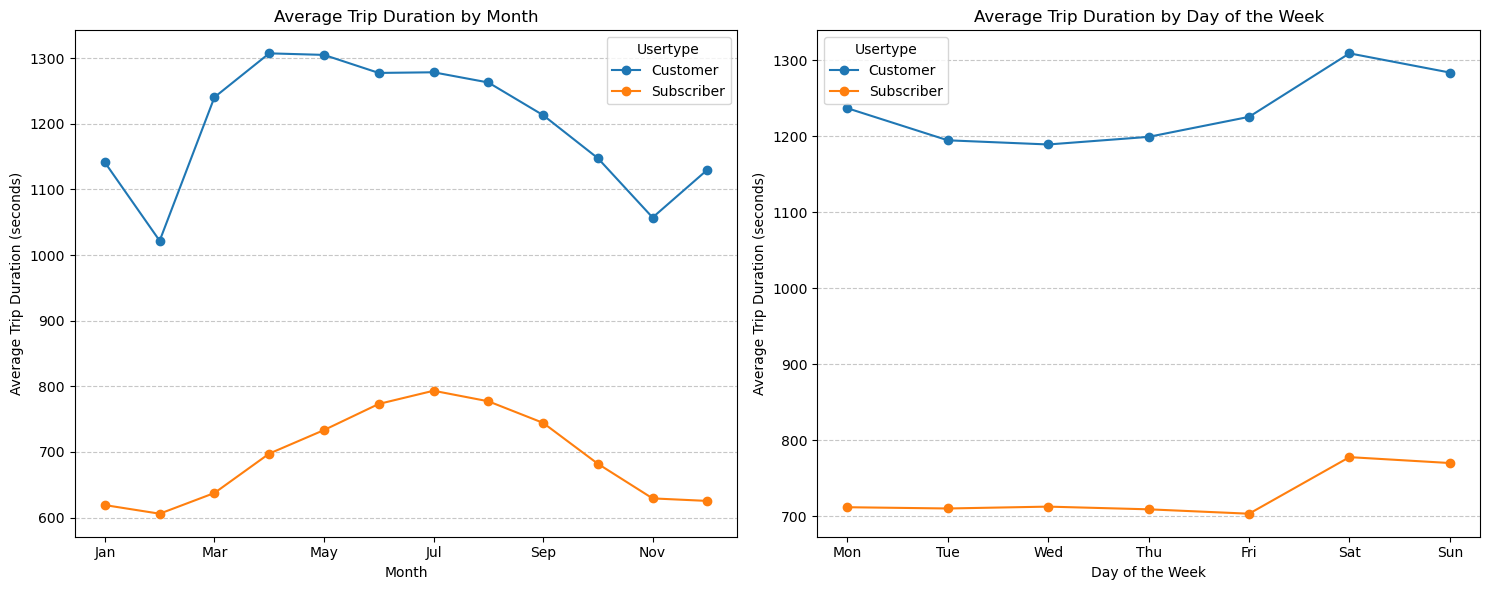

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. The average ride time for subscribers and customers on a monthly basis.
monthly_avg_trip = (df.groupby(['start_month', 'usertype'])['tripduration'].mean().unstack()
                    .reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']))

monthly_avg_trip.plot(ax=axes[0], marker='o')
axes[0].set_title('Average Trip Duration by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Trip Duration (seconds)')
axes[0].legend(title='Usertype')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. The average ride time for subscribers and customers on a weekly basis.
weekly_avg_trip = (df.groupby(['start_day_of_week', 'usertype'])['tripduration'].mean().unstack()
                   .reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']))

weekly_avg_trip.plot(ax=axes[1], marker='o')
axes[1].set_title('Average Trip Duration by Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Average Trip Duration (seconds)')
axes[1].legend(title='Usertype')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Step 8**

Calculate the ride numbers for each month of the year and each day of the week.

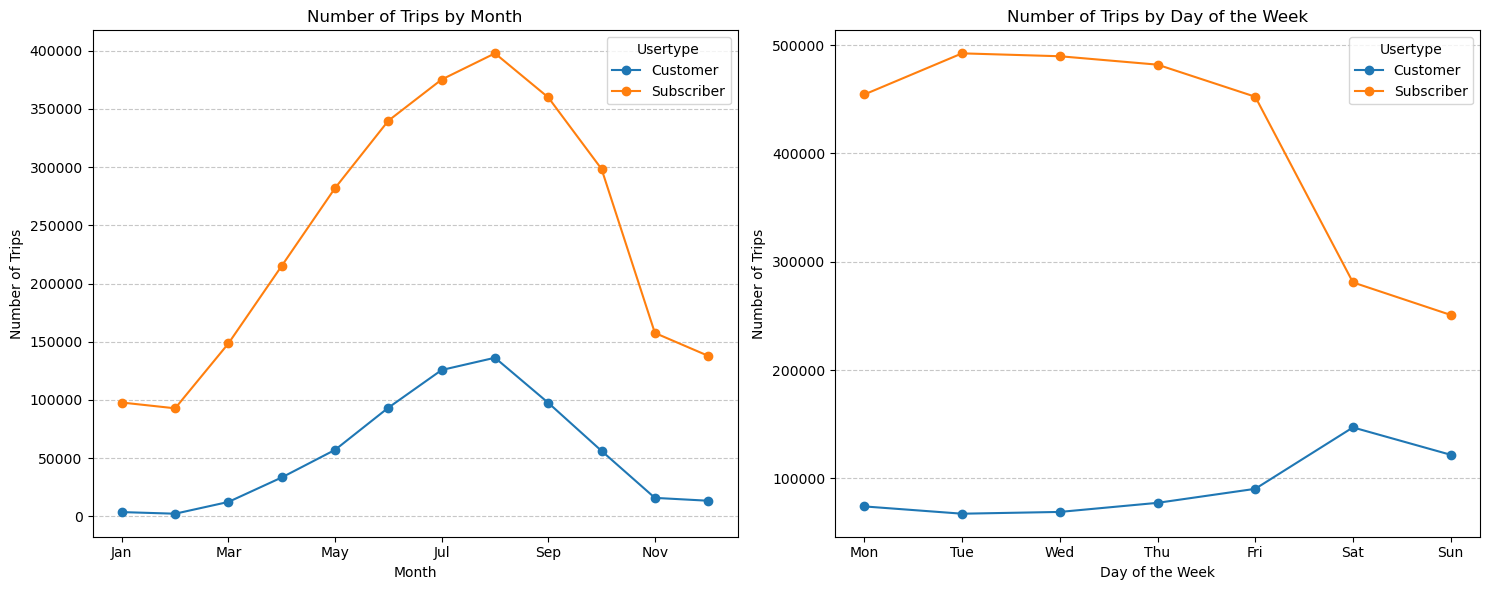

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. The ride numbers for subscribers and customers on a monthly basis.
monthly_trip_counts = (df.groupby(['start_month', 'usertype']).size().unstack()
                       .reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']))

monthly_trip_counts.plot(ax=axes[0], marker='o')
axes[0].set_title('Number of Trips by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Trips')
axes[0].legend(title='Usertype')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. The ride numbers for subscribers and customers on a weekly basis.
weekly_trip_counts = (df.groupby(['start_day_of_week', 'usertype']).size().unstack()
                      .reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']))

weekly_trip_counts.plot(ax=axes[1], marker='o')
axes[1].set_title('Number of Trips by Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Number of Trips')
axes[1].legend(title='Usertype')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Step 9**

Draw heat map for the ride numbers versus month and day of the week.

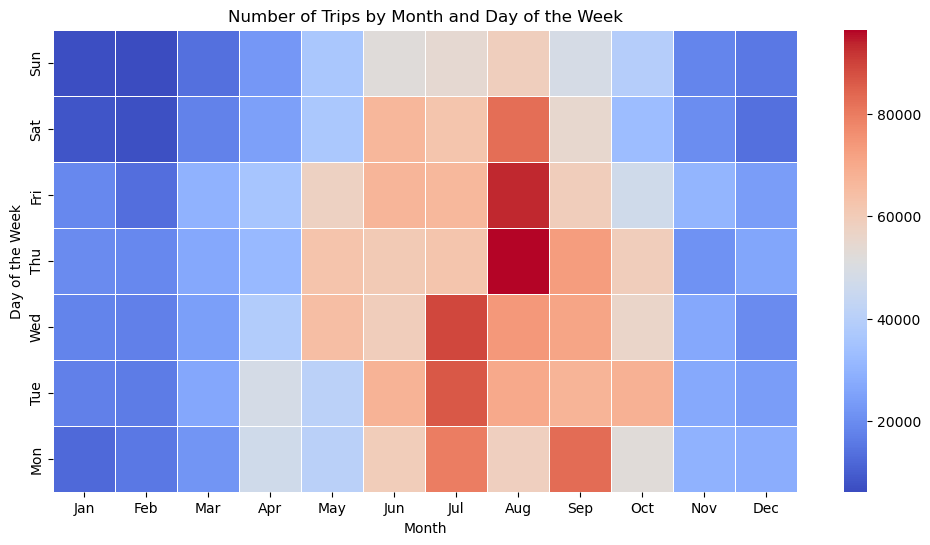

In [131]:
# Count the number of rides for each month and each day of the week.
pivot_table = df.pivot_table(index='start_day_of_week', columns='start_month', aggfunc='size', fill_value=0)

# Set thr sequence.
pivot_table = pivot_table.reindex(['Sun', 'Sat', 'Fri', 'Thu', 'Wed', 'Tue', 'Mon'])
pivot_table = pivot_table[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=False, fmt="d", cmap="coolwarm", linewidths=.5)
plt.title('Number of Trips by Month and Day of the Week')
plt.xlabel('Month')
plt.ylabel('Day of the Week')
plt.show()

**Step 10**

Calculate the most popular departure and arrival stations for subscribers and customers.

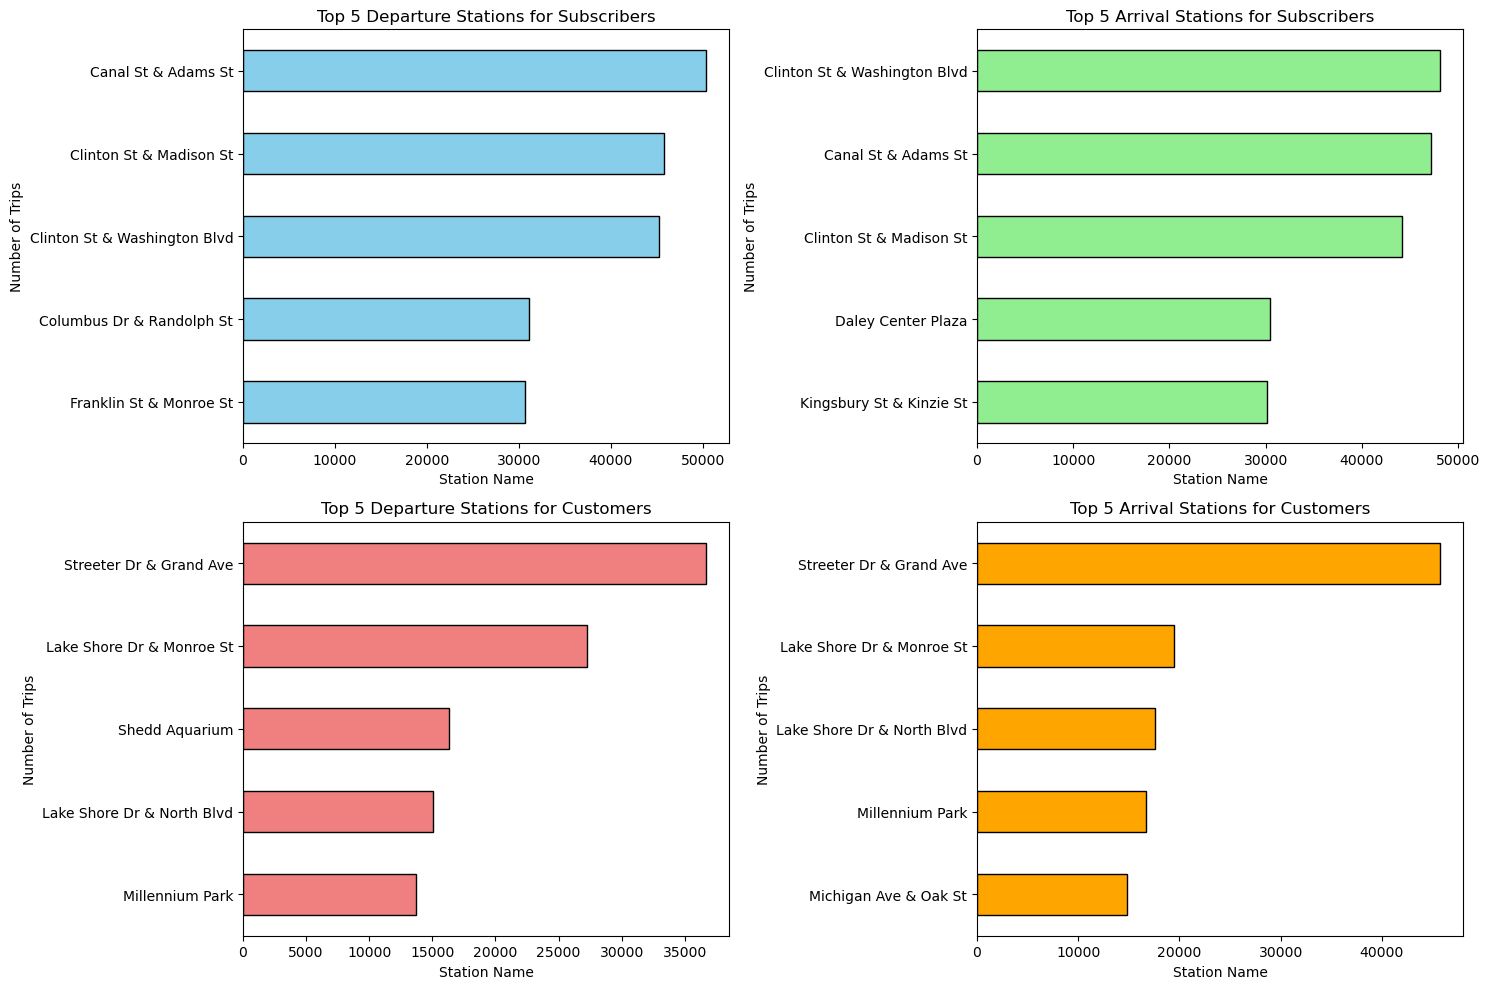

In [135]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. The most popular departure stations for subscribers.
top_from_stations_subscriber = df[df['usertype'] == 'Subscriber']['from_station_name'].value_counts().head(5).sort_values(ascending=True)
top_from_stations_subscriber.plot(kind='barh', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Top 5 Departure Stations for Subscribers')
axes[0, 0].set_xlabel('Station Name')
axes[0, 0].set_ylabel('Number of Trips')

# 2. The most popular arrival stations for subscribers.
top_to_stations_subscriber = df[df['usertype'] == 'Subscriber']['to_station_name'].value_counts().head(5).sort_values(ascending=True)
top_to_stations_subscriber.plot(kind='barh', ax=axes[0, 1], color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Top 5 Arrival Stations for Subscribers')
axes[0, 1].set_xlabel('Station Name')
axes[0, 1].set_ylabel('Number of Trips')

# 3. The most popular departure stations for customers.
top_from_stations_customer = df[df['usertype'] == 'Customer']['from_station_name'].value_counts().head(5).sort_values(ascending=True)
top_from_stations_customer.plot(kind='barh', ax=axes[1, 0], color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Top 5 Departure Stations for Customers')
axes[1, 0].set_xlabel('Station Name')
axes[1, 0].set_ylabel('Number of Trips')

# 4. The most popular arrival stations for customers.
top_to_stations_customer = df[df['usertype'] == 'Customer']['to_station_name'].value_counts().head(5).sort_values(ascending=True)
top_to_stations_customer.plot(kind='barh', ax=axes[1, 1], color='orange', edgecolor='black')
axes[1, 1].set_title('Top 5 Arrival Stations for Customers')
axes[1, 1].set_xlabel('Station Name')
axes[1, 1].set_ylabel('Number of Trips')

plt.tight_layout()
plt.show()